# Working environnment

In [1]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization
from matplotlib.gridspec import GridSpec

# Feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report

# Data preprocessing

In [2]:
# Dataset
data_bof = pd.read_pickle("bagOfFeatures.pkl")
data_bof.head()

,image,category,subcategory,lab_0,lab_1,lab_2,lab_3,lab_4,lab_5,lab_6,...,lab_50,lab_51,lab_52,lab_53,lab_54,lab_55,lab_56,lab_57,lab_58,lab_59
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,Curtains & Accessories,0.200000,0.000000,0.000000,0.0,0.200000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,Baby Bath & Skin,0.047619,0.000000,0.047619,0.0,0.095238,0.0,0.095238,...,0.047619,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,Baby Bath & Skin,0.000000,0.000000,0.000000,0.0,0.090909,0.0,0.136364,...,0.000000,0.0,0.022727,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.022727
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,Bed Linen,0.019608,0.039216,0.039216,0.0,0.019608,0.0,0.019608,...,0.039216,0.0,0.000000,0.0,0.019608,0.0,0.039216,0.039216,0.0,0.019608
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,Bed Linen,0.000000,0.000000,0.000000,0.0,0.250000,0.0,0.250000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.250000


In [3]:
# Remove images with no visual word
data_bof = data_bof[~data_bof['lab_0'].isna()]

# Defining features and labels
X_ = data_bof.loc[:,['lab_'+str(x) for x in range(60)]]

le = LabelEncoder()
y_ = le.fit_transform(data_bof['category'])
class_names = le.inverse_transform(range(len(le.classes_))).tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.35)
len(X_train), len(X_test)

# Functions

In [5]:
# Function for plotting scores
def plot_report(y_true, y_pred, class_names = class_names, title = ""):
    fig = plt.figure(figsize = (15,5))
    fig.suptitle(title, fontweight = 'heavy')
    gs = fig.add_gridspec(1,2, width_ratios = [1,2])
    ax1 = fig.add_subplot(gs[1])
    ax2 = fig.add_subplot(gs[0])
    
    # Plot classification report
    report = classification_report(y_true, y_pred, output_dict = True, target_names = class_names)
    df_report = pd.DataFrame(report).iloc[:2,:7]
    acc = round(100*report['accuracy'],1)
    
    df_report.T.plot(kind = 'bar', rot = 30, ax = ax1)
    ax1.set_title('Classification report (accuracy = {}%)'.format(acc), fontweight = 'demibold', fontsize = 10)
    ax1.set_xticklabels(class_names, rotation = 30, horizontalalignment = 'right')
    ax1.grid(True)
    
    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.subplot(ax2)
    sns.heatmap(conf_matrix, cmap = 'RdYlGn', annot = True, square = True, 
                cbar = False, xticklabels = class_names, yticklabels = class_names)
    ax2.set_title('Confusion matrix', fontweight = 'demibold', fontsize = 10)
    ax2.set_xticklabels(class_names, rotation = 30, horizontalalignment = 'right')
    plt.show()

In [6]:
# Perform grid search and train best model
def grid_pred(grid_model, X_test = X_test, y_test = y_test, title = ""):
    
    # Perform grid search
    grid_results_ = grid_model.fit(X_train, y_train)
    print(grid_results_.best_params_)

    # Train and predict with best params
    better_model = grid_model.best_estimator_
    better_model.fit(X_train, y_train)
    y_pred = better_model.predict(X_test)
    
    # Scoring
    plot_report(y_test, y_pred, title=title)
    
    return grid_results_, better_model, y_pred

# Baseline

<Figure size 1440x432 with 0 Axes>

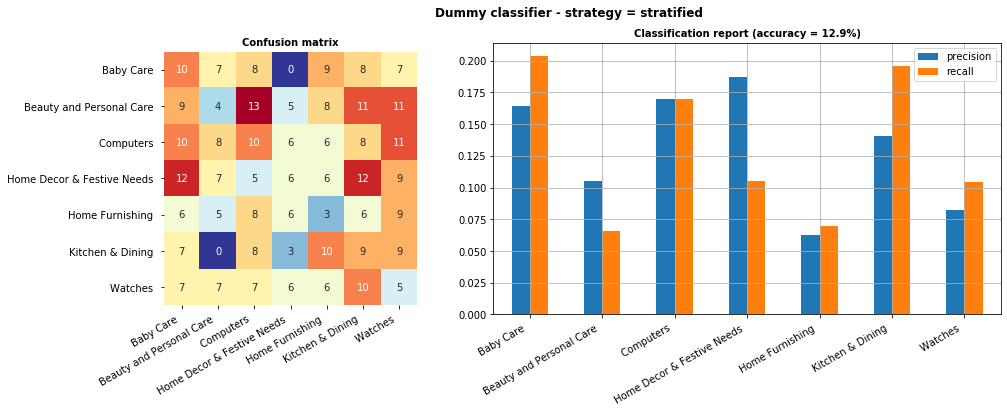

C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


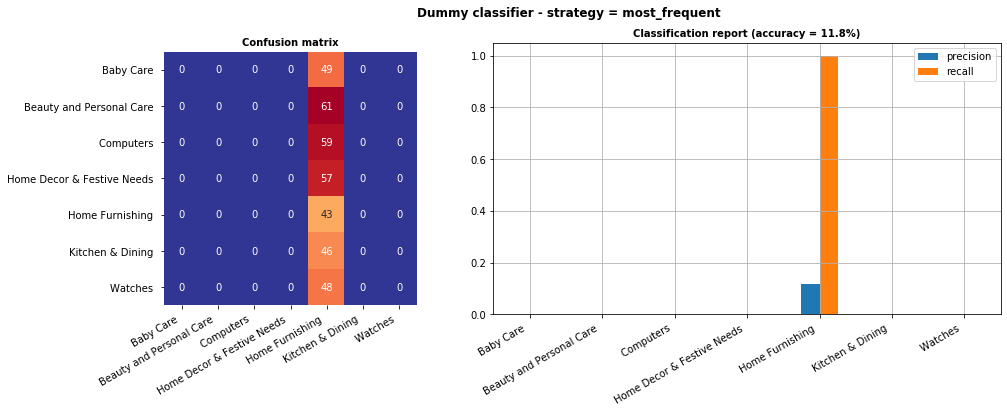

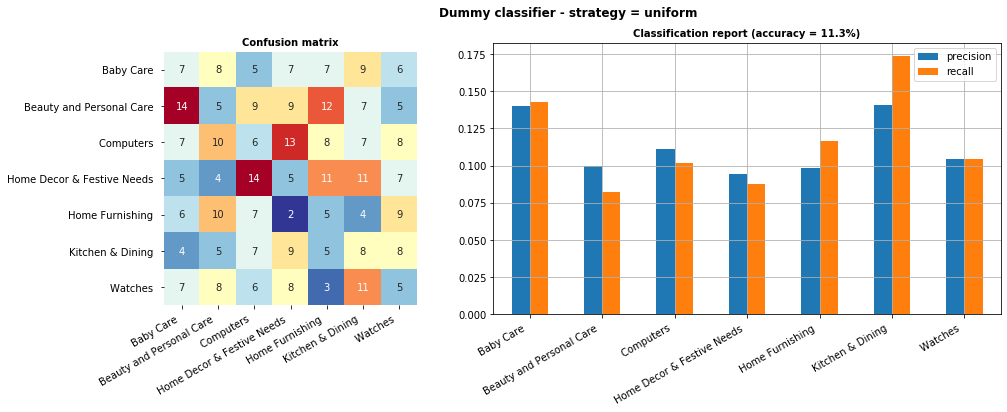

In [7]:
# Calcule scores with dummy classifiers
plt.figure(figsize = (20,6))
s_range = ['stratified', 'most_frequent', 'uniform']

for strat in s_range:
    dummy = DummyClassifier(strategy = strat)
    dummy.fit(X_train, y_train)
    y_dummy = dummy.predict(X_test)
    
    plot_report(y_test, y_dummy, title = "Dummy classifier - strategy = " + strat)
    plt.show()

# Linear SVC classification

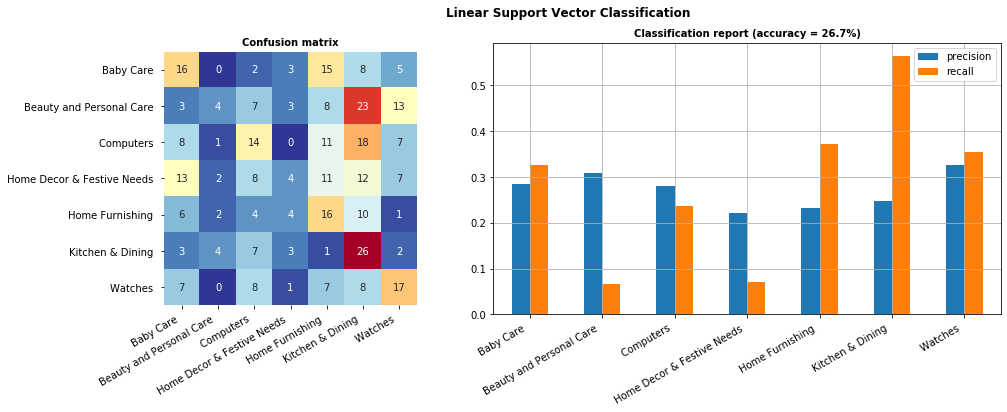

In [8]:
# With default parameters
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_lsvc = lsvc.predict(X_test)
plot_report(y_test, y_lsvc, title = 'Linear Support Vector Classification')

C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

{'C': 1.0, 'multi_class': 'ovr', 'penalty': 'l2'}


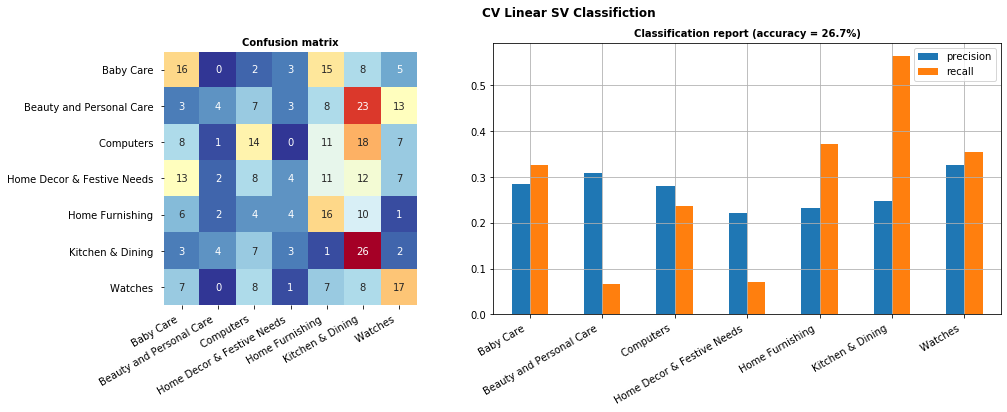

In [9]:
# Defining cross-validation
grid_lsvc = GridSearchCV(
    estimator = LinearSVC(max_iter = 2000, dual=False),
    param_grid = {
        'multi_class' : ['ovr', 'crammer_singer'],
        'C' : np.logspace(-3,3,7),
        'penalty' : ['l1', 'l2']
    },
    cv = 5,
    scoring = 'accuracy'
)

# Perform cross validation and evaluate best model
grid_lscv, lsvc_cv, y_lsvc_cv = grid_pred(grid_lsvc, title = "CV Linear SV Classifiction")

# KNeighbors Classifier

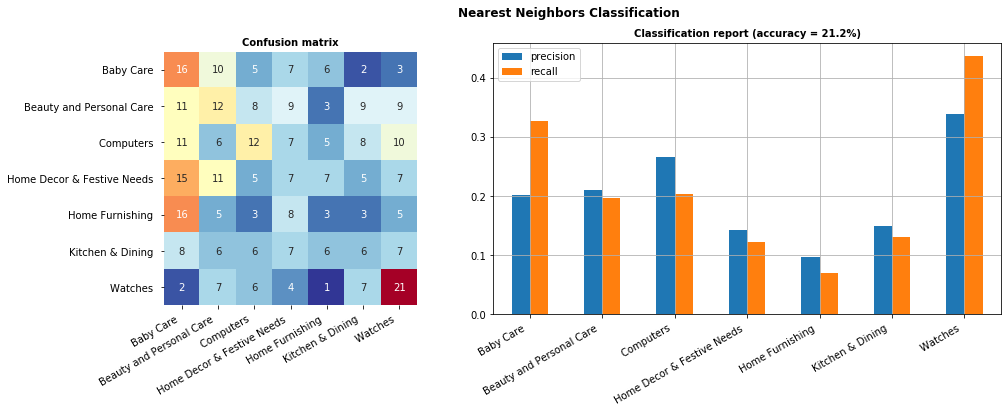

In [10]:
# With default parameters
kneigh = KNeighborsClassifier()
kneigh.fit(X_train, y_train)
y_kneigh = kneigh.predict(X_test)
plot_report(y_test, y_kneigh, title = 'Nearest Neighbors Classification')

{'n_neighbors': 35, 'weights': 'distance'}


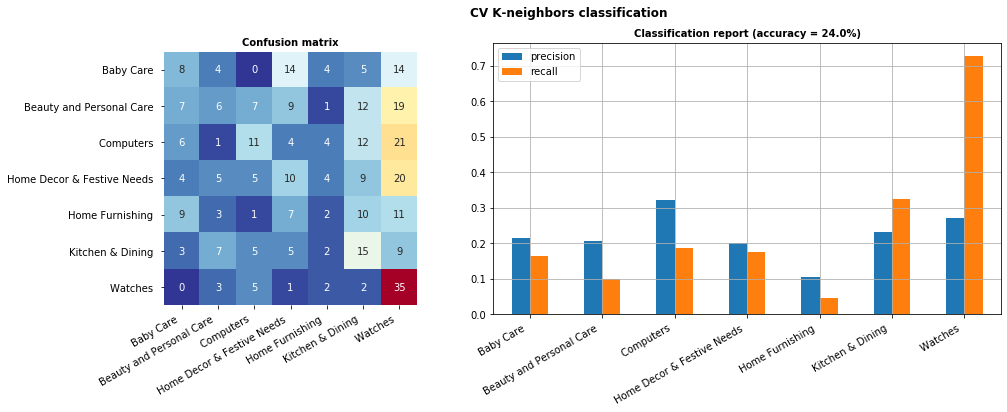

In [11]:
# Cross-validation
grid_kn = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = {
        'n_neighbors' : range(10,65,5),
        'weights' : ['uniform', 'distance']
    },
    cv = 5,
    scoring = 'accuracy'
)

grid_kn, kn_cv, y_kn_cv = grid_pred(grid_kn, title = 'CV K-neighbors classification')

# Support vector classifier

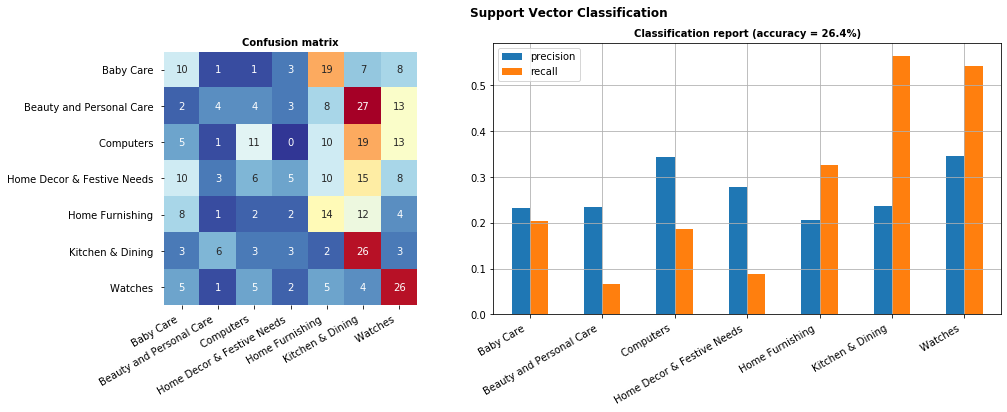

In [12]:
# With default parameters
svc = SVC()
svc.fit(X_train, y_train)
y_svc = svc.predict(X_test)
plot_report(y_test, y_svc, title = 'Support Vector Classification')

{'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}


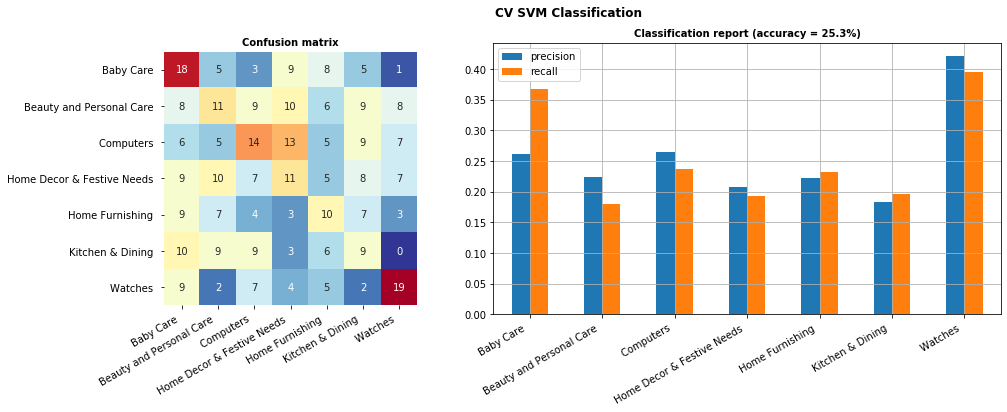

In [13]:
# Cross-validation
grid_svc = GridSearchCV(
    estimator = SVC(),
    param_grid = {
        'C' : np.logspace(-3,3,7),
        'gamma' : np.logspace(-3,3,7),
        'kernel' : ['rbf', 'poly', 'sigmoid']
    },
    cv = 5,
    scoring = 'accuracy'
)

grid_svc, svc_cv, y_svc_cv = grid_pred(grid_svc, title = 'CV SVM Classification')

# Random Forest

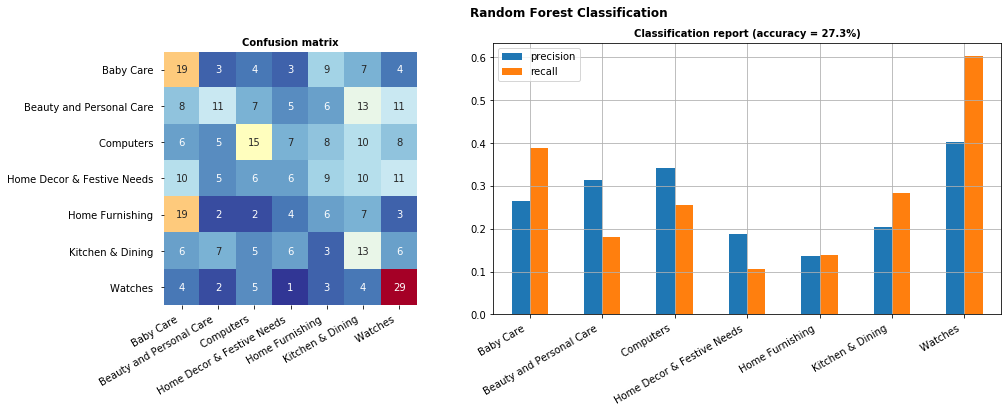

In [14]:
# With default parameters
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
plot_report(y_test, y_rf, title = 'Random Forest Classification')

{'max_depth': 14.0, 'max_features': 'auto'}


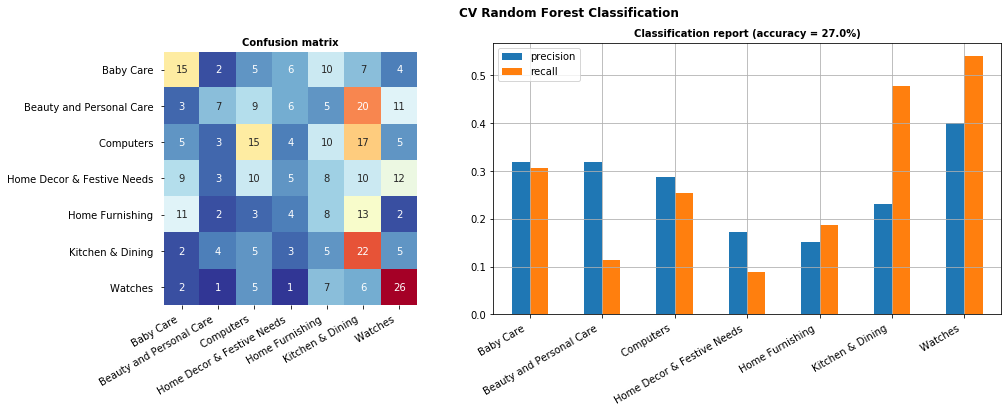

In [15]:
# Cross-validation
grid_svc = GridSearchCV(
    estimator = RandomForestClassifier(n_estimators = 500),
    param_grid = {
        'max_depth' : list(np.linspace(4,15,12)) + [None],
        'max_features' : ['auto', 'sqrt']
    },
    cv = 5,
    scoring = 'accuracy'
)

grid_svc, svc_cv, y_svc_cv = grid_pred(grid_svc, title = 'CV Random Forest Classification')

# AdaBoost

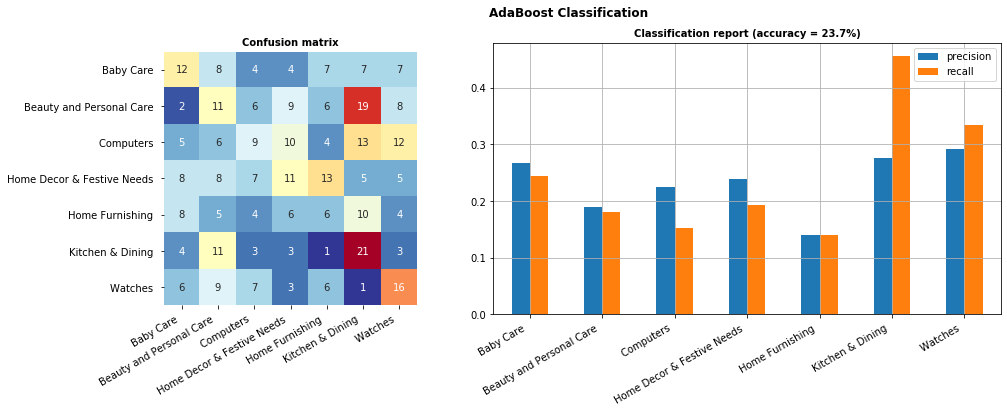

In [16]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_ada = ada.predict(X_test)
plot_report(y_test, y_ada, title = 'AdaBoost Classification')

{'learning_rate': 0.1}


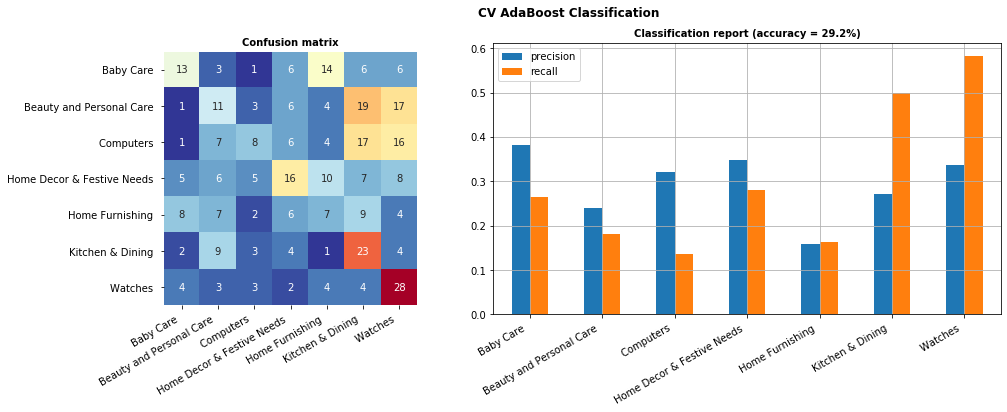

In [17]:
# Cross-validation
grid_ada = GridSearchCV(
    estimator = AdaBoostClassifier(n_estimators = 200),
    param_grid = {
        'learning_rate' : np.logspace(-5, -1, 5),
    },
    cv = 5,
    scoring = 'accuracy'
)

grid_ada, ada_cv, y_ada_cv = grid_pred(grid_ada, title = 'CV AdaBoost Classification')